<a href="https://colab.research.google.com/github/FAtheme/DL-Spring2024/blob/main/Exercise2%20-%20Fatemeh%20Barati/DL_E2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

In [ ]:
NUM_EPOCHS = 50
LEARNING_RATE = 1e-3
BATCH_SIZE = 32

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
trainset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
testset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'Conv_CIFAR10_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 32, 32)
    save_image(img, name)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Conv2d(
            in_channels=3, out_channels=8, kernel_size=3
        )
        self.enc2 = nn.Conv2d(
            in_channels=8, out_channels=4, kernel_size=3
        )
        # decoder
        self.dec1 = nn.ConvTranspose2d(
            in_channels=4, out_channels=8, kernel_size=3
        )
        self.dec2 = nn.ConvTranspose2d(
            in_channels=8, out_channels=3, kernel_size=3
        )
    def forward(self, x):
       x = F.relu(self.enc1(x))
       x = F.relu(self.enc2(x))
       x = F.relu(self.dec1(x))
       x = F.relu(self.dec2(x))
       return x
net = Autoencoder()
print(net)

Autoencoder(
  (enc1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (enc2): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1))
  (dec1): ConvTranspose2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (dec2): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [ ]:
def add_gaussian_noise(image, sigma):

  noise = torch.randn_like(image) * sigma**2
  noisy_image = image + noise

  # Optional clipping for normalized images between 0 and 1
  if image.min() >= 0.0 and image.max() <= 1.0:
    noisy_image = torch.clamp(noisy_image, min=0.0, max=1.0)

  return noisy_image

In [ ]:
def train(net, trainloader, NUM_EPOCHS):
    train_loss = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for data in trainloader:
            img, _ = data # no need for the labels
            img = img.to(device)
            # for i in range(10):
            #   img = img.view(-1, 3, 32, 32).cpu().data  # Reshape the image tensor
            #   plt.imshow(img)
            #   plt.show()
            img = add_gaussian_noise(img, 2)
            # for i in range(10):
            #   img = img.view(-1, 3, 32, 32).cpu().data  # Reshape the image tensor
            #   plt.imshow(img)
            #   plt.show()
            optimizer.zero_grad()
            outputs = net(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss / len(trainloader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, NUM_EPOCHS, loss))
        if epoch % 5 == 0:
            save_decoded_image(img.cpu().data, name='./Conv_CIFAR10_Images/original{}.png'.format(epoch))
            save_decoded_image(outputs.cpu().data, name='./Conv_CIFAR10_Images/decoded{}.png'.format(epoch))
    return train_loss
def test_image_reconstruction(net, testloader):
     for batch in testloader:
        img, _ = batch
        img = img.to(device)
        outputs = net(img)
        outputs = outputs.view(outputs.size(0), 3, 32, 32).cpu().data
        save_image(outputs, 'conv_cifar10_reconstruction.png')
        # for i in range(10):
        #       plt.imshow(outputs, 'conv_cifar10_reconstruction.png')
        #       plt.show()
        break

cuda:0
Epoch 1 of 50, Train Loss: 9.871
Epoch 2 of 50, Train Loss: 9.869
Epoch 3 of 50, Train Loss: 9.870
Epoch 4 of 50, Train Loss: 9.868
Epoch 5 of 50, Train Loss: 9.870
Epoch 6 of 50, Train Loss: 9.868
Epoch 7 of 50, Train Loss: 9.869
Epoch 8 of 50, Train Loss: 9.871
Epoch 9 of 50, Train Loss: 9.865
Epoch 10 of 50, Train Loss: 9.867
Epoch 11 of 50, Train Loss: 9.867
Epoch 12 of 50, Train Loss: 9.866
Epoch 13 of 50, Train Loss: 9.868
Epoch 14 of 50, Train Loss: 9.868
Epoch 15 of 50, Train Loss: 9.866
Epoch 16 of 50, Train Loss: 9.871
Epoch 17 of 50, Train Loss: 9.869
Epoch 18 of 50, Train Loss: 9.865
Epoch 19 of 50, Train Loss: 9.869
Epoch 20 of 50, Train Loss: 9.865
Epoch 21 of 50, Train Loss: 9.867
Epoch 22 of 50, Train Loss: 9.867
Epoch 23 of 50, Train Loss: 9.866
Epoch 24 of 50, Train Loss: 9.865
Epoch 25 of 50, Train Loss: 9.864
Epoch 26 of 50, Train Loss: 9.864
Epoch 27 of 50, Train Loss: 9.866
Epoch 28 of 50, Train Loss: 9.859
Epoch 29 of 50, Train Loss: 9.866
Epoch 30 of 50, 

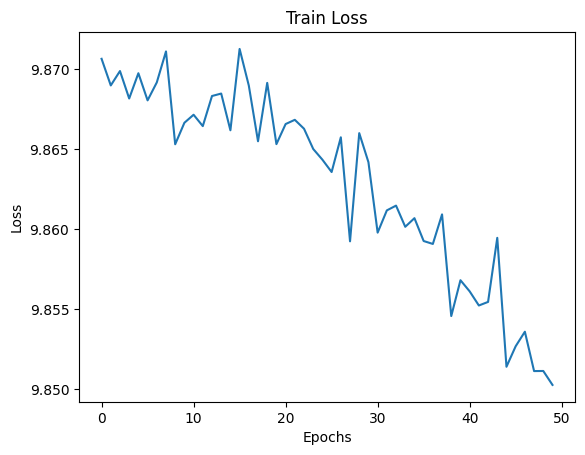

In [ ]:
device = get_device()
print(device)
net.to(device)
make_dir()
# train_loss = train(net, trainloader, NUM_EPOCHS)
train_loss = train(net, trainloader, NUM_EPOCHS)
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('conv_ae_cifar10_loss.png')
test_image_reconstruction(net, testloader)